# Data Analysis of Clash Royale Battles of January 1, 2021

## Data sources

Clash Royale Battles of January 1, 2021 :

https://www.kaggle.com/bwandowando/clash-royale-season-18-dec-0320-dataset?select=BattlesStaging_01012021_WL_tagged


Master List of cards of the season 18 : 

https://www.kaggle.com/bwandowando/clash-royale-season-18-dec-0320-dataset?select=CardMasterListSeason18_12082020.csv

## Initialization

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [28]:
df = pd.read_csv('D:/MesFichiers/MesDocuments/ISART/TRAVAIL/PEA/Python/Data/FichiersData/BattlesStaging_01012021_WL_tagged.csv')
df.head()

,Unnamed: 0,battleTime,arena.id,gameMode.id,average.startingTrophies,winner.tag,winner.startingTrophies,winner.trophyChange,winner.crowns,winner.kingTowerHitPoints,winner.princessTowersHitPoints,winner.clan.tag,winner.clan.badgeId,loser.tag,loser.startingTrophies,loser.trophyChange,loser.crowns,loser.kingTowerHitPoints,loser.clan.tag,loser.clan.badgeId,loser.princessTowersHitPoints,tournamentTag,winner.card1.id,winner.card1.level,winner.card2.id,winner.card2.level,winner.card3.id,winner.card3.level,winner.card4.id,winner.card4.level,winner.card5.id,winner.card5.level,winner.card6.id,winner.card6.level,winner.card7.id,winner.card7.level,winner.card8.id,winner.card8.level,winner.cards.list,winner.totalcard.level,winner.troop.count,winner.structure.count,winner.spell.count,winner.common.count,winner.rare.count,winner.epic.count,winner.legendary.count,winner.elixir.average,loser.card1.id,loser.card1.level,loser.card2.id,loser.card2.level,loser.card3.id,loser.card3.level,loser.card4.id,loser.card4.level,loser.card5.id,loser.card5.level,loser.card6.id,loser.card6.level,loser.card7.id,loser.card7.level,loser.card8.id,loser.card8.level,loser.cards.list,loser.totalcard.level,loser.troop.count,loser.structure.count,loser.spell.count,loser.common.count,loser.rare.count,loser.epic.count,loser.legendary.count,loser.elixir.average
0,0,2020-12-31 21:02:12+00:00,54000050.0,72000006.0,5363.0,#PVLPJP2Y,5372.0,28.0,2.0,4145.0,[1484],#2PYV00GQ,16000030.0,#PLYJVUQY2,5354.0,-28.0,1.0,1402.0,#8G2QJ9Y2,16000044.0,NaN,NaN,26000008,13,26000022,13,28000001,13,26000004,13,26000003,13,27000004,13,28000002,13,26000006,13,"[26000003, 26000004, 26000006, 26000008, 26000...",104,5,1,2,3,2,3,0,4.500,27000004,13,26000015,13,28000010,13,28000009,13,28000012,13,26000023,13,26000000,13,28000015,13,"[26000000, 26000015, 26000023, 27000004, 28000...",104,3,1,4,1,1,4,2,3.500
1,1,2020-12-31 21:02:15+00:00,54000050.0,72000006.0,5407.0,#8PRLRYYCV,5409.0,29.0,1.0,5304.0,"[579, 3082]",NaN,NaN,#92VG2CPY,5405.0,-29.0,0.0,5107.0,#8V22RYJ9,16000097.0,[2280],NaN,26000056,13,28000011,12,27000003,12,26000010,12,28000004,13,26000000,13,26000040,12,26000026,12,"[26000000, 26000010, 26000026, 26000040, 26000...",99,5,1,2,2,2,2,2,2.875,26000037,13,26000046,13,26000055,13,28000009,13,27000001,13,26000062,13,26000023,13,26000027,13,"[26000023, 26000027, 26000037, 26000046, 26000...",104,6,1,1,0,1,2,5,4.250
2,2,2020-12-31 21:02:45+00:00,54000050.0,72000006.0,5741.0,#2G8LQRCG,5749.0,28.0,2.0,5762.0,"[2080, 2099]",#29GY0C28,16000112.0,#2PCUY9U80,5733.0,-28.0,0.0,2070.0,#YCU29JR2,16000077.0,NaN,NaN,26000044,13,26000059,13,26000010,13,26000061,13,26000055,13,26000042,13,28000015,13,28000008,13,"[26000010, 26000042, 26000044, 26000055, 26000...",104,6,0,2,2,1,2,3,3.500,26000046,13,26000041,13,26000028,13,26000049,13,26000022,13,26000027,13,28000008,13,26000059,13,"[26000022, 26000027, 26000028, 26000041, 26000...",104,7,0,1,4,2,1,1,4.125
3,3,2020-12-31 21:03:13+00:00,54000050.0,72000006.0,4307.0,#Y9QL09VGV,4316.0,28.0,2.0,4392.0,[1322],#2J9YCYG0,16000168.0,#9GJJGYL8P,4298.0,-28.0,1.0,4228.0,#YR9YCRRC,16000163.0,NaN,NaN,28000004,11,28000000,9,26000041,11,26000016,10,26000026,10,28000011,11,26000023,10,28000012,8,"[26000016, 26000023, 26000026, 26000041, 28000...",80,4,0,4,1,1,3,3,3.250,26000027,10,26000031,10,28000000,10,26000033,10,26000046,10,26000012,10,26000062,10,27000006,10,"[26000012, 26000027, 26000031, 26000033, 26000...",80,6,1,1,2,1,2,3,3.750
4,4,2020-12-31 21:03:17+00:00,54000050.0,72000006.0,5776.5,#9RRYG9P9U,5783.0,28.0,3.0,5832.0,"[3668, 3668]",#V0U,16000054.0,#80J0LUCP8,5770.0,-28.0,0.0,NaN,#2QP222UU,16000114.0,NaN,NaN,28000011,13,26000021,13,26000014,13,26000038,13,28000000,13,26000030,13,26000010,13,27000000,13,"[26000010, 26000014, 26000021, 26000030, 26000...",104,5,1,2,3,4,0,1,2.625,26000021,13,27000004,13,26000037,13,28000011,13,26000064,13,28000000,13,26000011,13,26000010,13,"[26000010, 26000011, 26000021, 26000037, 26000...",104,5,1,2,2,4,0,2,3.250


## Card Sorting

The cards are sorted according to whether they were used by winners or losers, and according to whether they were used by "pros" or "noobs".

I set the limit between "pros" and "noobs" at 4600 trophies, which corresponds to the entry in the arena "15. Challenger III" arena, because it is from this arena that I noticed that the players have a good level and set up real strategies.

In [29]:
winner_cards_cols = ["winner.card" + str(x) + ".id" for x in range(1,9)]
winner_cards_cols

['winner.card1.id',
 'winner.card2.id',
 'winner.card3.id',
 'winner.card4.id',
 'winner.card5.id',
 'winner.card6.id',
 'winner.card7.id',
 'winner.card8.id']

In [30]:
loser_cards_cols = ["loser.card" + str(x) + ".id" for x in range(1,9)]
loser_cards_cols

['loser.card1.id',
 'loser.card2.id',
 'loser.card3.id',
 'loser.card4.id',
 'loser.card5.id',
 'loser.card6.id',
 'loser.card7.id',
 'loser.card8.id']

In [31]:
df_pros_winner_cards = df[winner_cards_cols][df['average.startingTrophies']>=4600]
df_pros_winner_cards

,winner.card1.id,winner.card2.id,winner.card3.id,winner.card4.id,winner.card5.id,winner.card6.id,winner.card7.id,winner.card8.id
0,26000008,26000022,28000001,26000004,26000003,27000004,28000002,26000006
1,26000056,28000011,27000003,26000010,28000004,26000000,26000040,26000026
2,26000044,26000059,26000010,26000061,26000055,26000042,28000015,28000008
4,28000011,26000021,26000014,26000038,28000000,26000030,26000010,27000000
5,26000041,26000045,28000002,26000043,26000049,26000011,26000021,28000011
...,...,...,...,...,...,...,...,...
2823520,28000004,26000026,26000018,28000011,26000000,27000006,26000049,26000027
2823521,26000009,26000018,26000015,28000001,26000039,26000048,28000007,28000015
2823523,26000012,26000016,26000017,26000007,28000003,26000024,27000006,27000010
2823524,28000007,26000012,28000000,27000001,26000022,26000008,26000019,26000032


In [32]:
df_pros_loser_cards = df[loser_cards_cols][df['average.startingTrophies']>=4600]
df_pros_loser_cards

,loser.card1.id,loser.card2.id,loser.card3.id,loser.card4.id,loser.card5.id,loser.card6.id,loser.card7.id,loser.card8.id
0,27000004,26000015,28000010,28000009,28000012,26000023,26000000,28000015
1,26000037,26000046,26000055,28000009,27000001,26000062,26000023,26000027
2,26000046,26000041,26000028,26000049,26000022,26000027,28000008,26000059
4,26000021,27000004,26000037,28000011,26000064,28000000,26000011,26000010
5,26000009,26000001,26000045,26000038,26000039,28000015,28000000,28000008
...,...,...,...,...,...,...,...,...
2823520,28000008,28000000,26000049,26000040,26000011,28000004,26000021,27000003
2823521,28000004,27000004,26000040,26000000,28000011,26000026,26000010,26000056
2823523,26000019,26000000,28000000,26000032,28000011,27000004,26000058,26000049
2823524,26000080,26000037,28000011,26000009,26000048,28000007,26000035,26000032


In [33]:
df_noobs_winner_cards = df[winner_cards_cols][df['average.startingTrophies']<4600]
df_noobs_winner_cards

,winner.card1.id,winner.card2.id,winner.card3.id,winner.card4.id,winner.card5.id,winner.card6.id,winner.card7.id,winner.card8.id
3,28000004,28000000,26000041,26000016,26000026,28000011,26000023,28000012
10,28000015,26000009,26000035,28000012,26000063,26000054,26000039,26000015
16,26000009,26000048,26000035,28000015,26000039,26000015,28000008,28000007
19,28000004,28000000,26000041,26000016,26000026,28000011,26000023,28000012
26,28000001,28000004,26000020,28000005,26000026,26000022,26000012,26000017
...,...,...,...,...,...,...,...,...
2823513,28000007,26000017,26000067,26000062,26000055,26000063,26000020,26000018
2823515,27000006,28000011,26000010,28000003,26000037,26000000,26000001,27000008
2823518,26000035,26000006,26000064,26000011,28000008,28000005,27000006,26000012
2823522,28000008,26000044,26000034,27000003,26000021,28000000,26000000,26000042


In [34]:
df_noobs_loser_cards = df[loser_cards_cols][df['average.startingTrophies']<4600]
df_noobs_loser_cards

,loser.card1.id,loser.card2.id,loser.card3.id,loser.card4.id,loser.card5.id,loser.card6.id,loser.card7.id,loser.card8.id
3,26000027,26000031,28000000,26000033,26000046,26000012,26000062,27000006
10,28000011,26000011,26000017,26000015,26000021,26000037,26000024,26000012
16,28000003,26000055,26000022,26000009,26000006,26000085,27000008,26000037
19,26000026,26000042,26000020,26000055,26000045,26000017,28000000,28000005
26,26000017,26000022,26000006,26000011,26000012,26000046,26000042,28000005
...,...,...,...,...,...,...,...,...
2823513,26000083,28000015,28000016,26000055,26000062,26000054,26000061,26000044
2823515,28000000,26000024,26000061,26000042,28000016,26000015,27000012,28000015
2823518,26000055,26000017,26000032,26000011,26000018,26000035,26000014,26000042
2823522,28000008,26000011,26000004,28000010,26000042,26000035,26000017,28000001


## Card counting

In [35]:
df_pros_winner_cards_values, df_pros_winner_cards_counts = np.unique(df_pros_winner_cards, return_counts=True)

In [36]:
df_pros_loser_cards_values, df_pros_loser_cards_counts = np.unique(df_pros_loser_cards, return_counts=True)

In [37]:
df_noobs_winner_cards_values, df_noobs_winner_cards_counts = np.unique(df_noobs_winner_cards, return_counts=True)

In [38]:
df_noobs_loser_cards_values, df_noobs_loser_cards_counts = np.unique(df_noobs_loser_cards, return_counts=True)

In [39]:
df_MasterList = pd.read_csv("D:/MesFichiers/MesDocuments/ISART/TRAVAIL/PEA/Python/Data/FichiersData/CardMasterListSeason18_12082020.csv")

## Setup of the card counts' DataFrame

In [40]:
df_counts = df_MasterList.copy()
df_counts

,team.card1.id,team.card1.name
0,26000000,Knight
1,26000001,Archers
2,26000002,Goblins
3,26000003,Giant
4,26000004,P.E.K.K.A
5,26000005,Minions
6,26000006,Balloon
7,26000007,Witch
8,26000008,Barbarians
9,26000009,Golem


In [41]:
df_counts.rename(columns={"team.card1.id" : "Card ID", "team.card1.name" : "Card Name"}, inplace=True)

## Assignment of card counts

In [42]:
df_counts["Winner Use (PRO)"] = df_pros_winner_cards_counts
df_counts["Loser Use (PRO)"] = df_pros_loser_cards_counts
df_counts["Winner Use (NOOB)"] = df_noobs_winner_cards_counts
df_counts["Loser Use (NOOB)"] = df_noobs_loser_cards_counts
df_counts

,Card ID,Card Name,Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
0,26000000,Knight,319232,318508,169214,179742
1,26000001,Archers,100801,101545,61201,82352
2,26000002,Goblins,20413,20656,10678,18237
3,26000003,Giant,107688,107503,43266,60057
4,26000004,P.E.K.K.A,205842,200343,123006,115558
5,26000005,Minions,164672,163519,91512,98901
6,26000006,Balloon,245645,243650,167079,161938
7,26000007,Witch,189009,196006,214283,203353
8,26000008,Barbarians,94351,92243,44305,46718
9,26000009,Golem,162087,155521,59733,55898


## Usage Calculation

In [43]:
df_counts["Total Winner Use"] = df_counts["Winner Use (PRO)"] + df_counts["Winner Use (NOOB)"]
df_counts["Total Loser Use"] = df_counts["Loser Use (PRO)"] + df_counts["Loser Use (NOOB)"]
df_counts["Total Use (PRO)"] = df_counts["Winner Use (PRO)"] + df_counts["Loser Use (PRO)"]
df_counts["Total Use (NOOB)"] = df_counts["Winner Use (NOOB)"] + df_counts["Loser Use (NOOB)"]
df_counts

,Card ID,Card Name,Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB),Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB)
0,26000000,Knight,319232,318508,169214,179742,488446,498250,637740,348956
1,26000001,Archers,100801,101545,61201,82352,162002,183897,202346,143553
2,26000002,Goblins,20413,20656,10678,18237,31091,38893,41069,28915
3,26000003,Giant,107688,107503,43266,60057,150954,167560,215191,103323
4,26000004,P.E.K.K.A,205842,200343,123006,115558,328848,315901,406185,238564
5,26000005,Minions,164672,163519,91512,98901,256184,262420,328191,190413
6,26000006,Balloon,245645,243650,167079,161938,412724,405588,489295,329017
7,26000007,Witch,189009,196006,214283,203353,403292,399359,385015,417636
8,26000008,Barbarians,94351,92243,44305,46718,138656,138961,186594,91023
9,26000009,Golem,162087,155521,59733,55898,221820,211419,317608,115631


In [44]:
df_counts_columns = list(df_counts.columns)
df_counts = df_counts[df_counts_columns[0:2] + df_counts_columns[6:10] + df_counts_columns[2:6]]
df_counts

,Card ID,Card Name,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
0,26000000,Knight,488446,498250,637740,348956,319232,318508,169214,179742
1,26000001,Archers,162002,183897,202346,143553,100801,101545,61201,82352
2,26000002,Goblins,31091,38893,41069,28915,20413,20656,10678,18237
3,26000003,Giant,150954,167560,215191,103323,107688,107503,43266,60057
4,26000004,P.E.K.K.A,328848,315901,406185,238564,205842,200343,123006,115558
5,26000005,Minions,256184,262420,328191,190413,164672,163519,91512,98901
6,26000006,Balloon,412724,405588,489295,329017,245645,243650,167079,161938
7,26000007,Witch,403292,399359,385015,417636,189009,196006,214283,203353
8,26000008,Barbarians,138656,138961,186594,91023,94351,92243,44305,46718
9,26000009,Golem,221820,211419,317608,115631,162087,155521,59733,55898


In [45]:
df_counts.insert(2, "Total Use", df_counts["Total Winner Use"]+df_counts["Total Loser Use"])
df_counts

,Card ID,Card Name,Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
0,26000000,Knight,986696,488446,498250,637740,348956,319232,318508,169214,179742
1,26000001,Archers,345899,162002,183897,202346,143553,100801,101545,61201,82352
2,26000002,Goblins,69984,31091,38893,41069,28915,20413,20656,10678,18237
3,26000003,Giant,318514,150954,167560,215191,103323,107688,107503,43266,60057
4,26000004,P.E.K.K.A,644749,328848,315901,406185,238564,205842,200343,123006,115558
5,26000005,Minions,518604,256184,262420,328191,190413,164672,163519,91512,98901
6,26000006,Balloon,818312,412724,405588,489295,329017,245645,243650,167079,161938
7,26000007,Witch,802651,403292,399359,385015,417636,189009,196006,214283,203353
8,26000008,Barbarians,277617,138656,138961,186594,91023,94351,92243,44305,46718
9,26000009,Golem,433239,221820,211419,317608,115631,162087,155521,59733,55898


## Pick Rate Calculation

In [46]:
games_nb = len(df)
games_nb

2823527

In [47]:
pros_games_nb = len(df_pros_winner_cards)
pros_games_nb

1742323

In [48]:
noobs_games_nb = len(df_noobs_winner_cards)
noobs_games_nb

1081204

In [49]:
df_counts.insert(2, "Global Pick Rate", df_counts["Total Use"]/games_nb)
df_counts.insert(3, "Pick Rate (PRO)", df_counts["Total Use (PRO)"]/pros_games_nb)
df_counts.insert(4, "Pick Rate (NOOB)", df_counts["Total Use (NOOB)"]/noobs_games_nb)
df_counts

,Card ID,Card Name,Global Pick Rate,Pick Rate (PRO),Pick Rate (NOOB),Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
0,26000000,Knight,0.349455,0.366029,0.322748,986696,488446,498250,637740,348956,319232,318508,169214,179742
1,26000001,Archers,0.122506,0.116136,0.132771,345899,162002,183897,202346,143553,100801,101545,61201,82352
2,26000002,Goblins,0.024786,0.023571,0.026743,69984,31091,38893,41069,28915,20413,20656,10678,18237
3,26000003,Giant,0.112807,0.123508,0.095563,318514,150954,167560,215191,103323,107688,107503,43266,60057
4,26000004,P.E.K.K.A,0.228349,0.233128,0.220647,644749,328848,315901,406185,238564,205842,200343,123006,115558
5,26000005,Minions,0.183672,0.188364,0.176112,518604,256184,262420,328191,190413,164672,163519,91512,98901
6,26000006,Balloon,0.289819,0.280829,0.304306,818312,412724,405588,489295,329017,245645,243650,167079,161938
7,26000007,Witch,0.284272,0.220978,0.386269,802651,403292,399359,385015,417636,189009,196006,214283,203353
8,26000008,Barbarians,0.098323,0.107095,0.084187,277617,138656,138961,186594,91023,94351,92243,44305,46718
9,26000009,Golem,0.153439,0.182290,0.106947,433239,221820,211419,317608,115631,162087,155521,59733,55898


## Win Rate Calculation

In [50]:
df_counts.insert(5, 'Global Win Rate', df_counts['Total Winner Use']/ df_counts['Total Use'])
df_counts.insert(6, 'Win Rate (PRO)', df_counts['Winner Use (PRO)']/ df_counts['Total Use (PRO)'])
df_counts.insert(7, 'Win Rate (NOOB)', df_counts['Winner Use (NOOB)']/ df_counts['Total Use (NOOB)'])
df_counts

,Card ID,Card Name,Global Pick Rate,Pick Rate (PRO),Pick Rate (NOOB),Global Win Rate,Win Rate (PRO),Win Rate (NOOB),Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
0,26000000,Knight,0.349455,0.366029,0.322748,0.495032,0.500568,0.484915,986696,488446,498250,637740,348956,319232,318508,169214,179742
1,26000001,Archers,0.122506,0.116136,0.132771,0.468351,0.498162,0.426330,345899,162002,183897,202346,143553,100801,101545,61201,82352
2,26000002,Goblins,0.024786,0.023571,0.026743,0.444259,0.497042,0.369289,69984,31091,38893,41069,28915,20413,20656,10678,18237
3,26000003,Giant,0.112807,0.123508,0.095563,0.473932,0.500430,0.418745,318514,150954,167560,215191,103323,107688,107503,43266,60057
4,26000004,P.E.K.K.A,0.228349,0.233128,0.220647,0.510040,0.506769,0.515610,644749,328848,315901,406185,238564,205842,200343,123006,115558
5,26000005,Minions,0.183672,0.188364,0.176112,0.493988,0.501757,0.480597,518604,256184,262420,328191,190413,164672,163519,91512,98901
6,26000006,Balloon,0.289819,0.280829,0.304306,0.504360,0.502039,0.507813,818312,412724,405588,489295,329017,245645,243650,167079,161938
7,26000007,Witch,0.284272,0.220978,0.386269,0.502450,0.490913,0.513086,802651,403292,399359,385015,417636,189009,196006,214283,203353
8,26000008,Barbarians,0.098323,0.107095,0.084187,0.499451,0.505649,0.486745,277617,138656,138961,186594,91023,94351,92243,44305,46718
9,26000009,Golem,0.153439,0.182290,0.106947,0.512004,0.510337,0.516583,433239,221820,211419,317608,115631,162087,155521,59733,55898


## Sorted DataFrames

In [51]:
df_counts_pickrate_sorted = df_counts.sort_values('Global Pick Rate', ascending=False)
df_counts_pickrate_sorted

,Card ID,Card Name,Global Pick Rate,Pick Rate (PRO),Pick Rate (NOOB),Global Win Rate,Win Rate (PRO),Win Rate (NOOB),Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
94,28000011,The Log,0.575322,0.534026,0.641870,0.503116,0.499851,0.507494,1624437,817281,807156,930445,693992,465084,465361,352197,341795
91,28000008,Zap,0.553916,0.629006,0.432911,0.508894,0.504321,0.519603,1563997,795909,768088,1095932,468065,552701,543231,243208,224857
11,26000011,Valkyrie,0.545913,0.548884,0.541125,0.502879,0.496240,0.513730,1541400,775137,766263,956334,585066,474571,481763,300566,284500
17,26000017,Wizard,0.539694,0.471992,0.648793,0.498446,0.489639,0.508771,1523841,759553,764288,822363,701478,402661,419702,356892,344586
83,28000000,Fireball,0.495818,0.538706,0.426707,0.495566,0.495886,0.494916,1399956,693771,706185,938599,461357,465438,473161,228333,233024
12,26000012,Skeleton Army,0.488210,0.366751,0.683938,0.502172,0.496674,0.506922,1378474,692231,686243,638998,739476,317374,321624,374857,364619
84,28000001,Arrows,0.410948,0.446906,0.353004,0.501402,0.501384,0.501440,1160324,581789,578535,778655,381669,390405,388250,191384,190285
21,26000021,Hog Rider,0.407718,0.446866,0.344633,0.504332,0.497323,0.518978,1151204,580589,570615,778585,372619,387208,391377,193381,179238
55,26000055,Mega Knight,0.389626,0.305608,0.525019,0.501715,0.497058,0.506084,1100120,551947,548173,532467,567653,264667,267800,287280,280373
15,26000015,Baby Dragon,0.377549,0.356781,0.411016,0.504255,0.503499,0.505313,1066020,537546,528474,621628,444392,312989,308639,224557,219835


In [52]:
df_counts_winrate_sorted = df_counts.sort_values('Global Win Rate', ascending=False)
df_counts_winrate_sorted

,Card ID,Card Name,Global Pick Rate,Pick Rate (PRO),Pick Rate (NOOB),Global Win Rate,Win Rate (PRO),Win Rate (NOOB),Total Use,Total Winner Use,Total Loser Use,Total Use (PRO),Total Use (NOOB),Winner Use (PRO),Loser Use (PRO),Winner Use (NOOB),Loser Use (NOOB)
36,26000036,Battle Ram,0.069408,0.084862,0.044504,0.518990,0.517852,0.522486,195975,101709,94266,147857,48118,76568,71289,25141,22977
39,26000039,Mega Minion,0.135737,0.177683,0.068142,0.515163,0.514956,0.516037,383257,197440,185817,309582,73675,159421,150161,38019,35656
48,26000048,Night Witch,0.133009,0.158307,0.092243,0.514037,0.514408,0.513010,375555,193049,182506,275822,99733,141885,133937,51164,48569
29,26000029,Lava Hound,0.047113,0.058340,0.029020,0.513930,0.516454,0.505753,133024,68365,64659,101647,31377,52496,49151,15869,15508
53,26000053,Rascals,0.023881,0.028287,0.016781,0.512154,0.509445,0.519511,67429,34534,32895,49285,18144,25108,24177,9426,8718
54,26000054,Cannon Cart,0.039183,0.049719,0.022204,0.512121,0.514528,0.503436,110634,56658,53976,86627,24007,44572,42055,12086,11921
9,26000009,Golem,0.153439,0.182290,0.106947,0.512004,0.510337,0.516583,433239,221820,211419,317608,115631,162087,155521,59733,55898
27,26000027,Dark Prince,0.151529,0.156523,0.143481,0.511180,0.510364,0.512615,427845,218706,209139,272713,155132,139183,133530,79523,75609
90,28000007,Lightning,0.140562,0.188596,0.063158,0.510388,0.510772,0.508545,396882,202564,194318,328595,68287,167837,160758,34727,33560
56,26000056,Skeleton Barrel,0.135538,0.163565,0.090372,0.510128,0.508262,0.515571,382694,195223,187471,284983,97711,144846,140137,50377,47334


## Visualization

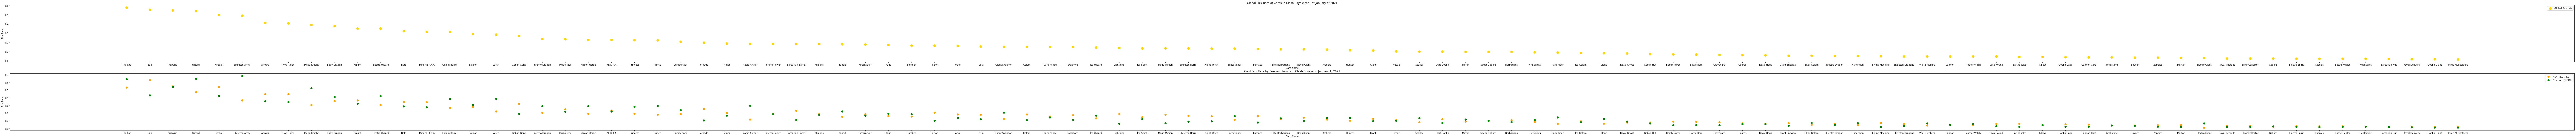

In [53]:
plt.figure(figsize=(200,10))

plt.subplot(2,1,1)
plt.scatter(df_counts_pickrate_sorted["Card Name"], df_counts_pickrate_sorted["Global Pick Rate"], c="gold", lw=5, label="Global Pick rate")
plt.title("Global Pick Rate of Cards in Clash Royale the 1st January of 2021")
plt.xlabel("Card Name")
plt.ylabel("Pick Rate")
plt.legend()

plt.subplot(2,1,2)
plt.scatter(df_counts_pickrate_sorted["Card Name"], df_counts_pickrate_sorted["Pick Rate (PRO)"], c="orange", lw=3, label="Pick Rate (PRO)")
plt.scatter(df_counts_pickrate_sorted["Card Name"], df_counts_pickrate_sorted["Pick Rate (NOOB)"], c="green", lw=3, label="Pick Rate (NOOB)")
plt.title("Card Pick Rate by Pros and Noobs in Clash Royale on January 1, 2021")
plt.xlabel("Card Name")
plt.ylabel("Pick Rate")
plt.legend()

plt.show()

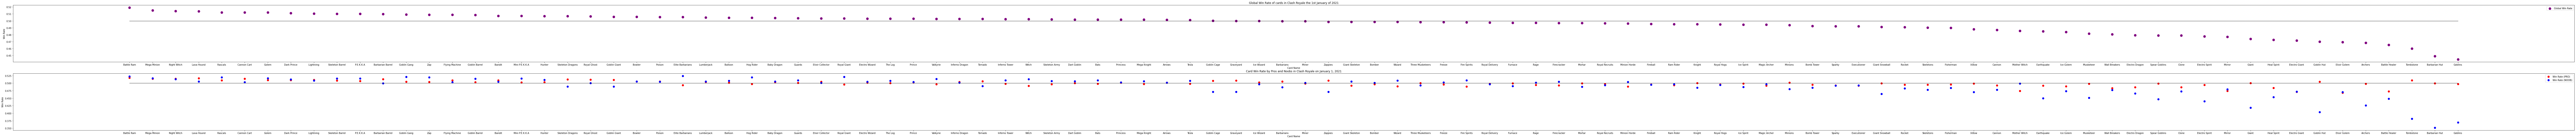

In [54]:
plt.figure(figsize=(200,10))

plt.subplot(2,1,1)
plt.scatter(df_counts_winrate_sorted["Card Name"], df_counts_winrate_sorted["Global Win Rate"], c="purple", lw=5, label="Global Win Rate")
plt.plot(df_counts_winrate_sorted["Card Name"], np.full(102, 0.5), c="black", lw=1)
plt.title("Global Win Rate of cards in Clash Royale the 1st January of 2021")
plt.xlabel("Card Name")
plt.ylabel("Win Rate")
plt.legend()

plt.subplot(2,1,2)
plt.scatter(df_counts_winrate_sorted["Card Name"], df_counts_winrate_sorted["Win Rate (PRO)"], c="red", lw=3, label="Win Rate (PRO)")
plt.scatter(df_counts_winrate_sorted["Card Name"], df_counts_winrate_sorted["Win Rate (NOOB)"], c="blue", lw=3, label="Win Rate (NOOB)")
plt.plot(df_counts_winrate_sorted["Card Name"], np.full(102, 0.5), c="black", lw=1)
plt.title("Card Win Rate by Pros and Noobs in Clash Royale on January 1, 2021")
plt.xlabel("Card Name")
plt.ylabel("Win Rate")
plt.legend()

plt.show()